In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.optimizers import RMSprop

%matplotlib inline

Using Theano backend.


In [2]:
def read_train(filename):
    with open(filename) as f:
        lines = f.readlines()
    labels = [line.split(',')[0] for line in lines[1:]]
    digits = [[int(d) for d in line.split(',')[1:]] for line in lines[1:]]
    return labels, digits

In [3]:
[labels_train, digits_train] = read_train('data/digits/train.csv')

In [4]:
def read_test(filename):
    with open(filename) as f:
        lines = f.readlines()
    digits = [[int(d) for d in line.split(',')] for line in lines[1:]]
    return digits

In [5]:
digits_test = read_test('data/digits/test.csv')

In [6]:
print(labels_train[3])
print(digits_train[3])

4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 220, 179, 6, 0, 0, 0, 0, 0, 0, 0, 0, 9, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 247, 17, 0, 0, 0, 0, 0, 0, 0, 0, 27, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 242, 155, 0, 0, 0, 0, 0, 0, 0, 0, 27, 254, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 160, 207, 6, 0, 0, 0, 0, 0, 0, 0, 27, 254, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 127, 254, 21, 0, 0, 0, 0, 0, 0, 0, 20, 239, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 254, 21, 0, 0, 0, 0, 0, 0, 0, 0, 195, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 254,

In [7]:
def plot_digit(digit, label):
    picture = np.array(digit).reshape((28, 28))
    img = Image.fromarray(picture)
    plt.title(label)
    plt.imshow(picture)
    
    return None

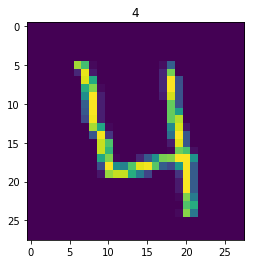

In [8]:
plot_digit(digits_train[3], labels_train[3])

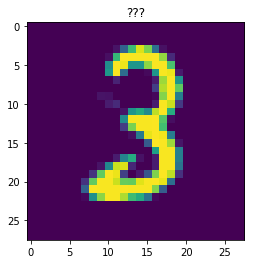

In [9]:
plot_digit(digits_test[4], '???')

In [10]:
# convert class vectors to binary class matrices
labels_train_onehot = np_utils.to_categorical(labels_train, 10)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 512)           401920      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 512)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 512)           0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           262656      dropout_1[0][0]                  
___________________________________________________________________________________________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(digits_train, labels_train_onehot,
                    batch_size=64, nb_epoch=5,
                    verbose=1)

Epoch 1/5
42000/42000 [==============================] - 9s - loss: 12.0256 - acc: 0.2534      

In [12]:
labels_predicted = model.predict(digits_test, batch_size=32, verbose=0)

In [13]:
predicted = pd.DataFrame(labels_predicted)
predicted = predicted.idxmax(1)

In [14]:
submission = pd.DataFrame({'ImageId':range(1,28001), 'Label':predicted.values})
submission.head()
submission.to_csv('submissions/digits/submission_3.csv', index=False)